# (Ford GoBike System Data)
## by (your name here)

## Preliminary Wrangling

> This data contain the rides of bike in a bike-sharing system in an Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### load the Dataset

In [2]:
#load the data
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [3]:
#get the shape of the data
print(bike.shape)

(183412, 16)


In [4]:
#get info about nulls and data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#get data statistics
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Cleaning

>- Drop colums that i won't use in my analysis.
>- Drop null values.
>- Add [Age] column from the member_birth_year column then i droped it.
>- convert the data type from  object to date time then convert it to three columns [month] , [day] and [Hour].
>- drop month column because it's only February.
>- convert Age and hour data types to int.
>- convert the the duration fromm seconds to minutes then convert its data type to int.

In [6]:
#copy the dataset
df=bike.copy()

#drop unwanted columns
df=df.drop(['start_station_id' , 'start_station_latitude' , 'start_station_longitude', 'end_station_id' , 'end_station_latitude','end_station_longitude' , 'bike_id','start_station_name','end_station_name'] ,axis=1)

In [7]:
df.head(5)

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Subscriber,1974.0,Male,Yes


In [8]:
#get the shape of the data
df.shape

(183412, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   user_type                183412 non-null  object 
 4   member_birth_year        175147 non-null  float64
 5   member_gender            175147 non-null  object 
 6   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.8+ MB


In [10]:
#drop nulls
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   user_type                175147 non-null  object 
 4   member_birth_year        175147 non-null  float64
 5   member_gender            175147 non-null  object 
 6   bike_share_for_all_trip  175147 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.7+ MB


In [12]:
#get tha user age from the member birth year
df['Age']= 2019 - df['member_birth_year']

In [13]:
#drop the member_birth year column
df=df.drop(['member_birth_year'] , axis=1)
df.head()

,duration_sec,start_time,end_time,user_type,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Customer,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Customer,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Subscriber,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Subscriber,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,Subscriber,Male,No,60.0


In [14]:
#convert the data type from  object to date time
df.start_time = pd.to_datetime(df.start_time)

#Return Indexes formatted strings specified by date_format (day , month , hour)
#df['trip_month'] = df.start_time.dt.strftime('%b')
df['trip_day'] = df.start_time.dt.strftime('%a')
df['trip_hour'] = df.start_time.dt.strftime('%H')

In [15]:
df['trip_day'].nunique()

7

In [16]:
df.head()

,duration_sec,start_time,end_time,user_type,member_gender,bike_share_for_all_trip,Age,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Customer,Male,No,35.0,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,Customer,Male,No,47.0,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,Subscriber,Other,No,30.0,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,Subscriber,Male,Yes,45.0,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,Subscriber,Male,No,60.0,Thu,23


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  object        
 3   user_type                175147 non-null  object        
 4   member_gender            175147 non-null  object        
 5   bike_share_for_all_trip  175147 non-null  object        
 6   Age                      175147 non-null  float64       
 7   trip_day                 175147 non-null  object        
 8   trip_hour                175147 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 13.4+ MB


In [18]:
#convert the Age and trip_hour data type to int
df['Age']=df['Age'].astype(int)
df['trip_hour']=df['trip_hour'].astype(int)

In [19]:
#convert duration to be by minute
df['duration']=df['duration_sec']/60

#convert the duration data set to int
df['duration']=df['duration'].astype(int)

In [20]:
df.head()

,duration_sec,start_time,end_time,user_type,member_gender,bike_share_for_all_trip,Age,trip_day,trip_hour,duration
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Customer,Male,No,35,Thu,17,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,Customer,Male,No,47,Thu,12,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,Subscriber,Other,No,30,Thu,17,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,Subscriber,Male,Yes,45,Thu,23,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,Subscriber,Male,No,60,Thu,23,29


### What is the structure of your dataset?

> data of 183412 trip with 16 feature . the data is about rides in February month.

### What is/are the main feature(s) of interest in your dataset?

> ***The main feture is :*** <br>
>- duration_sec  <br>
>- member_birth_year <br>
>- start_time <br>
>- user_type <br>
>- member_gender <br>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think (Age , duration , day ,hour, user gender , user type) comparing between them and what is the behaviour of each custumer type in diffrent hour in day and in different days in the week . compare genders with diffrent user types. get the relation between the age and duration of the trips

## Univariate Exploration
> Here i want to explore the Age , user type , member gender and the duration.

In [21]:
#colors from seaborn palette
blue=sb.color_palette()[0]
pink=sb.color_palette("husl", 8)[0]
grey=sb.color_palette('bright')[7]

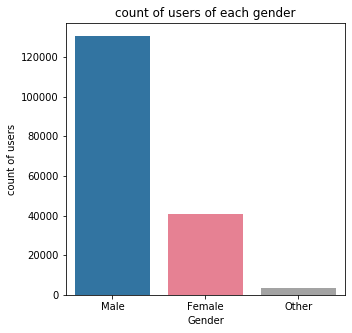

In [22]:
#set the figure size
plt.figure(figsize=[5,5])

#order the gender by the count
gender_order=df['member_gender'].value_counts().index

#figure the count plot of member gender
ax=sb.countplot(data=df ,x='member_gender' , order=gender_order , palette=(blue,pink,grey))
ax.set(xlabel='Gender', ylabel='count of users')
plt.title('count of users of each gender');

### Gender count
In the figure above i noticed that male is the most user gender then female then other.

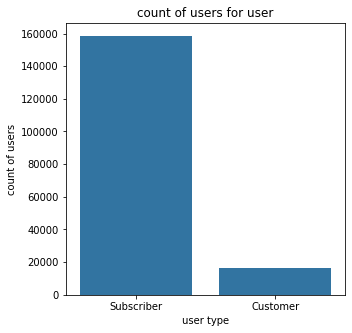

In [23]:
#set the figure size
plt.figure(figsize=[5,5])

#the order of users by the count
type_order=df['user_type'].value_counts().index

#figure the count plot of user type
ax=sb.countplot(data=df ,x='user_type' , order=type_order , color=blue)
ax.set(xlabel='user type', ylabel='count of users')
plt.title('count of users for user');

Here we can see that the count of subscrober user is more than customer.

### Age distribution

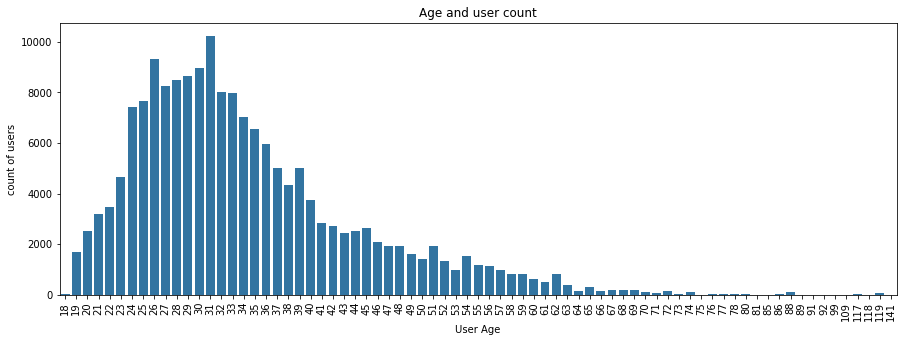

In [24]:
#declare color from seaborn color
color=sb.color_palette()[0]

#set the figure size
plt.figure(figsize=[15,5])

#figure the count plot of the user Age
ax=sb.countplot(data=df , x='Age', color=color)
plt.title('Age and user count')
ax.set(xlabel='User Age', ylabel='count of users')
plt.xticks(rotation=90);

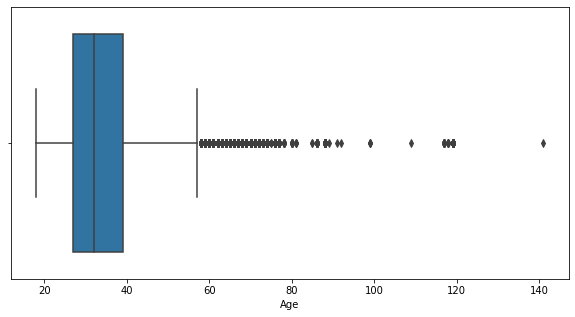

In [25]:
#box plot figure to get data rande and outliers
plt.figure(figsize=[10,5])
sb.boxplot(data=df , x='Age');

In [26]:
#delete outliers (user age more than 60)
df=df[df['Age']<=60]
#display the max Age in the dataset
df['Age'].max()

60

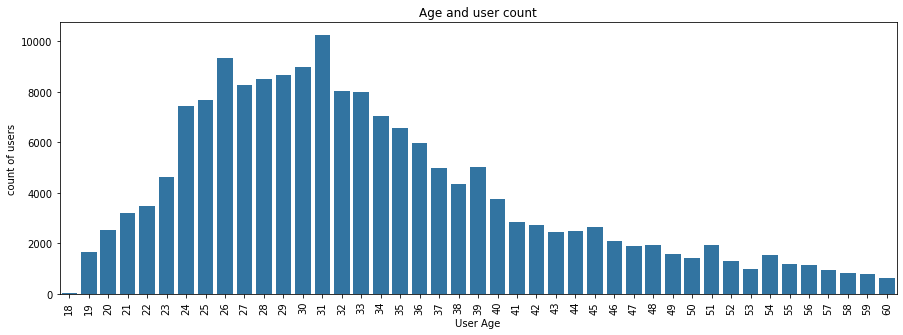

In [27]:
#set the figure size
plt.figure(figsize=[15,5])

#visual the count plot the Age after drpo the outliers 
ax=sb.countplot(data=df , x='Age', color=color)
plt.title('Age and user count')
ax.set(xlabel='User Age', ylabel='count of users')
plt.xticks(rotation=90);

### Age distribution:
I think thers is outliers in the age so boxplot made it easier to me to get it an delete these outliers (more than 60 years) then i get the count plot it and the most of users between  20 , 40 years.

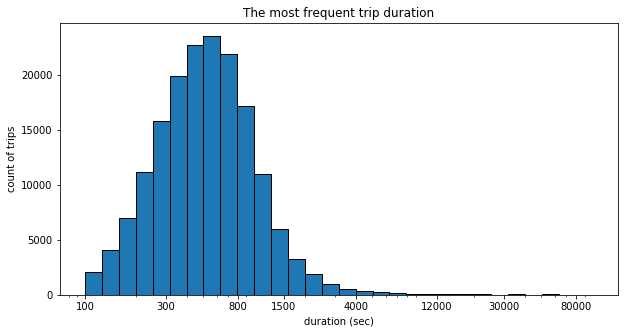

In [28]:
#set figure size
plt.figure(figsize=[10, 5])

#set hist bins
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 

#visuale the histgrame of the duration_sec
plt.hist(data=df, x='duration_sec', bins=bins , edgecolor='black')
x_ticks = [100,300,800, 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in x_ticks]
#scale x axis
plt.xscale('log')
plt.xticks(x_ticks, labels)
plt.xlabel('duration (sec)')
plt.ylabel('count of trips')
plt.title('The most frequent trip duration');

### Duration distribution in sec
Most of the points are less than 2000 seconds with about 500 seconds peak.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - here i'm intrestes in (member gender , user type , Age ,Duration) features.
> - I noticed that the most common gender is male then female and other is a little number of users.
> - Subscriber user are most common in the data more than customers
> - the most common ages are between 20 and 40 years. there is outliers in the age (age above 60) then i drop it from the data.
> - The duration from 300 second to 800 and the log scale was required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - I converted start_time to 2 columns (hours , day) , member_birth_year to Age and duration_sec to duration in minutes.
> - I think almost of variabls are engineered.

## Bivariate Exploration


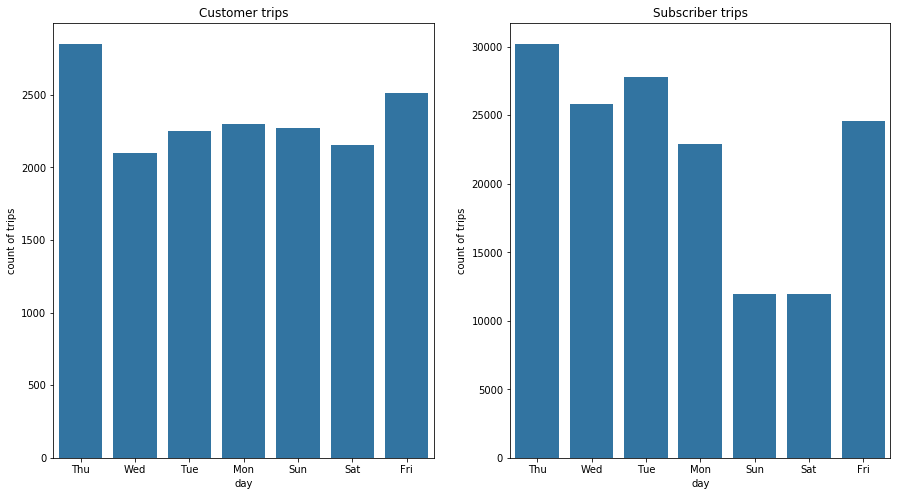

In [29]:
#set the figure size
plt.figure(figsize=[15,8])

#get color fron seaborn palette
color=sb.color_palette()[0]

plt.subplot(1,2,1)

#visual the countplot of customer on week days
ax=sb.countplot(data=df[df['user_type']=='Customer'] , x='trip_day' , color=color)
plt.title('Customer trips')
ax.set(xlabel='day', ylabel='count of trips');

plt.subplot(1,2,2)

#visual the countplot of customer on week days
ax=sb.countplot(data=df[df['user_type']=='Subscriber'] , x='trip_day' , color=color)
plt.title('Subscriber trips')
ax.set(xlabel='day', ylabel='count of trips');

### User Types Vs week days
>- According to this visuale, i noticed that in the subscriber type in the weekends (sun , sat) is the least count of trips. so that i think they use their bikes to go work.
>- According to this visuale, i noticed that in the customer trips are over the week but thursday is the the most trips.

### User Types Vs Gender
>- the data is right skewed as expected

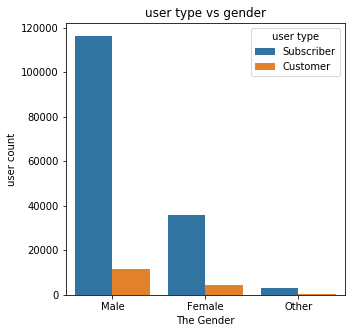

In [30]:
#set the figure size
plt.figure(figsize=[5,5])

#count plot the member gender for the user type
sb.countplot(data=df , x='member_gender' ,hue='user_type' , hue_order=type_order ,order=gender_order)
plt.title('user type vs gender')
plt.xlabel('The Gender')
plt.ylabel('user count')
plt.legend(title='user type');

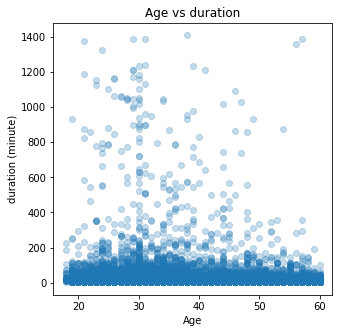

In [31]:
#set the figure size
plt.figure(figsize=[5,5])

#the scatter plot define the relation between the Age an duration in minutes
ax=sb.regplot(data=df , x='Age',y='duration' ,fit_reg=False ,scatter_kws ={'alpha':1/4})

#set the visual title
plt.title('Age vs duration')
ax.set(xlabel='Age', ylabel='duration (minute)');

### Duration Vs Age
> - As most of the durations are below 200 minutes and age is below 60.
> - the more Age increase the duration less slightly not as i expected.

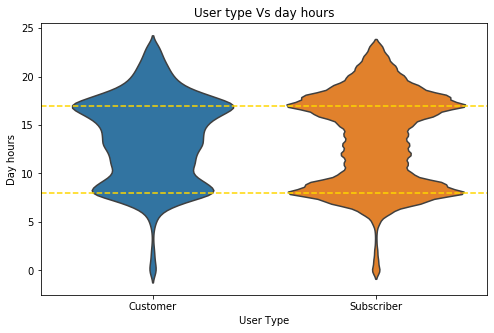

In [32]:
#set the figure size
plt.figure(figsize=[8,5])

#set the violin plot between the user type and the day hours of the trip
sb.violinplot(data=df , x='user_type' , y='trip_hour' , inner=None);
plt.xlabel('User Type')
plt.ylabel('Day hours')
plt.title('User type Vs day hours')

#set gold lines in the most wide edges
plt.axhline(y=8 , color='gold' , linestyle='--')
plt.axhline(y=17 , color='gold' , linestyle='--');

### user type VS day hours
> - The most rides are in 8 am and 17 pm.

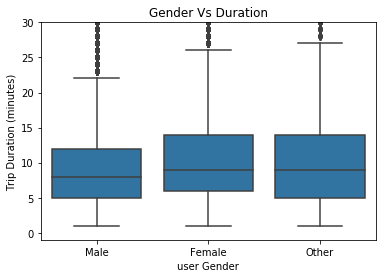

In [33]:
#plot the relation between the member gender and duration in minutes in a box plot
sb.boxplot(data=df, x='member_gender', y='duration', order=gender_order ,color=color)

#set the titles of the figure
plt.title('Gender Vs Duration')
plt.xlabel('user Gender')
plt.ylabel('Trip Duration (minutes)')

#cut outlier duration in the figure to make it clear
plt.ylim([-1,30]);

### Duration Vs Gender
> i see females and others are slightly higher duration than males

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relation between the user type and the days of week , i see the count of rides for subscribers is decreased Significantly in the weekend days (sat,sun). according to custumer there's no significantly increase or decrease of trips expected in thursday the trip count increased for both types of users.

>The relation between the Age and trip duration , i see there is slightly decrease in the duration while increasing of the age.

>The relation between user Type and the day hours , i see the most common trips are on 8 and 17 o'clock in the day.
>The relation between Gender and duration , other and female duration more than males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> i expected that male gender will have high duration than females and others but i found females and other are higher duration trips than males howver males have very high count of trips than females and others.

>decrease of trips count on weekend for subscribers make me think about time they start the trip to know if they user it to go work , school or colleague.

## Multivariate Exploration

C:\Users\a\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


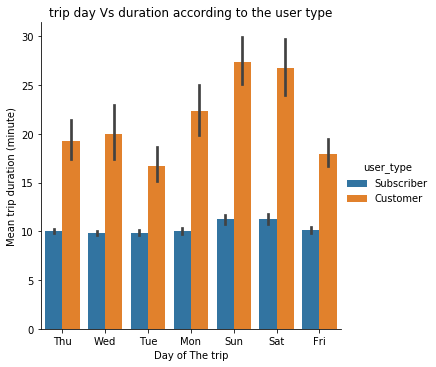

In [34]:
#set the user type order by i's count
type_order=df['user_type'].value_counts().index

#set bar plot between the day of trip and the mean of trip dration in minutes
sb.catplot(data=df, kind='bar', x='trip_day', y='duration', hue='user_type' , hue_order=type_order )

plt.xlabel('Day of The trip')
plt.ylabel('Mean trip duration (minute)')
plt.title('trip day Vs duration according to the user type');

### Mean trip duration for both user types across week days
> The mean of trip duration fo customers are more than subscribers specially in Weekends

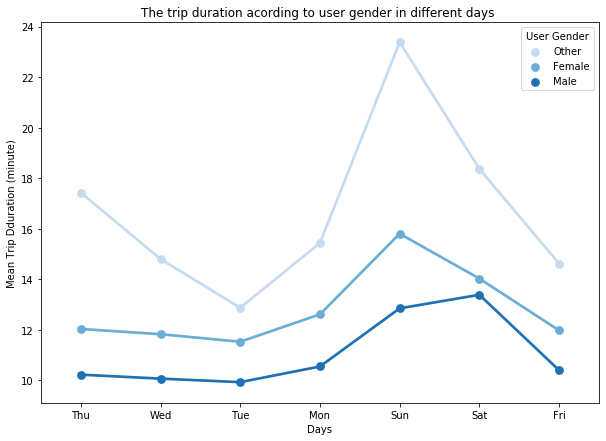

In [35]:
#set the figure size
fig = plt.figure(figsize = [10,7])

#set the point plot between day of the trip and duration of each member gender
sb.pointplot(data = df, x = 'trip_day', y = 'duration', hue = 'member_gender',hue_order=gender_order[::-1] ,palette = 'Blues', ci=None)

#set the title of the hue
plt.legend(title='User Gender')
plt.title('The trip duration acording to user gender in different days ')
plt.ylabel('Mean Trip Dduration (minute)')
plt.xlabel('Days');

### The trip duration acording to user gender in different days 
> - other have the higher duration trips then females then males  , the duration increeased significantly for all gender types in sunday and saturday.

C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


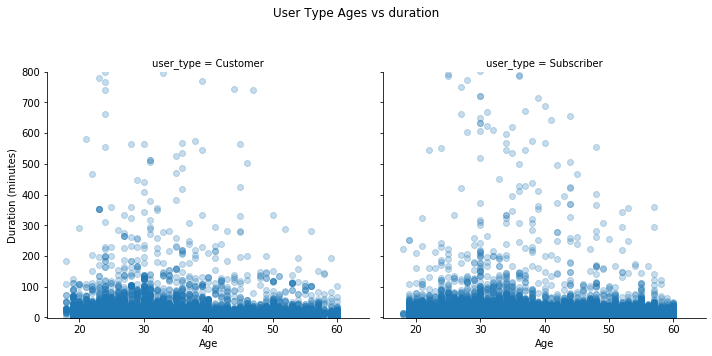

In [36]:
#set facet grid to user type column
g = sb.FacetGrid(data = df, col = 'user_type', size = 5, xlim = [15, 65], ylim = [-1, 800])

#map the scatter plot in each grid between the age and the duration
g.map(plt.scatter, 'Age', 'duration', alpha=0.25)

#set titles and labels of the figures
g.set_xlabels('Age')
g.set_ylabels('Duration (minutes)')
#ax.set_title('User Type Ages vs duration')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('User Type Ages vs duration');

### User Type in the relation between the duration and Age
>- I want to explore the relation between the duration and Age according to the user type 

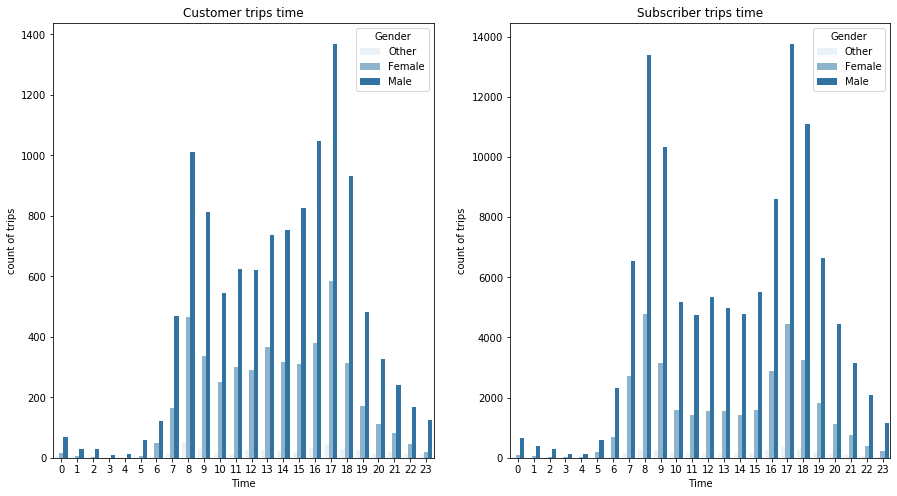

In [37]:
#set the figure size
plt.figure(figsize=[15,8])

plt.subplot(1,2,1)

#count plot the day hours of trip for the customer user and gender
ax=sb.countplot(data=df[df['user_type']=='Customer'] , x='trip_hour', hue='member_gender' ,hue_order=gender_order[::-1] , color=color)
plt.title('Customer trips time')
ax.set(xlabel='Time', ylabel='count of trips')
plt.legend(title='Gender');

plt.subplot(1,2,2)

#count plot the day hours of trip for the subscriber user and gender
ax=sb.countplot(data=df[df['user_type']=='Subscriber'] , x='trip_hour', hue='member_gender' ,hue_order=gender_order[::-1], color=color)
plt.title('Subscriber trips time')
ax.set(xlabel='Time', ylabel='count of trips')
plt.legend(title='Gender');

### Customer and subscriber trip times and gender
i want to explore that if there is relation between the user type and Time and put gender in my exploration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the relation between the duration in week days for the different genders , i noticed that other have the higher duration trips then females then males  , the duration increeased significantly for all gender types in sunday and saturday.

>The relation between the duration and Age according to the user type , custumers and subscriber looking there are similar in the duration for ages.

>The relation between the day and duration for subscriber and customer user, the mean of trip duration of the customers are more than subscribers specially in Weekends

>I found there is no thing noticed about gender change along day time in both customer and subscriber.
>in subscriber the most trips at 8 , 9 ,17 , 18 o'clock and i think it's work or colleague time.
 
### Were there any interesting or surprising interactions between features?

> Other members has much higher trip duration than onother genders.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!